In [13]:
import pandas as pd
import numpy as np
import datetime 
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import hvplot.pandas
import seaborn as sns
%matplotlib inline
from yahoofinancials import YahooFinancials

In [14]:
#Trailing one year data 
start_sp = datetime.datetime(2018, 10, 1)
end_sp = datetime.datetime(2019, 10, 1)

#create dataframes

#Bitcoin 

VGT_df_year = pdr.get_data_yahoo('VGT', start_sp, end_sp)

#SPDR S&P 500 ETF
SPX_df_year = pdr.get_data_yahoo('SPY', start_sp, end_sp)

#US Dollar/USDX - Index
USD_df_year = pdr.get_data_yahoo('DX-Y.NYB', start_sp, end_sp)


In [15]:
#Drop extra columns to be left with closing price 
VGT_df_year.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
VGT_df_year.head()
SPX_df_year.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
SPX_df_year.head()
USD_df_year.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
USD_df_year.head()

,Close
Date,
2018-10-01,95.300003
2018-10-02,95.510002
2018-10-03,95.760002
2018-10-04,95.750000
2018-10-05,95.620003


In [16]:
#rename closing column
VGT_df_year = VGT_df_year.rename(columns = {"Close": "VGT Daily Returns"}) 
SPX_df_year = SPX_df_year.rename(columns = {"Close": "SPY Daily Returns"}) 
USD_df_year = USD_df_year.rename(columns = {"Close": "USD Daily Returns"}) 

In [17]:
combined_df_year_price = pd.concat([VGT_df_year, SPX_df_year, USD_df_year],axis='columns', join="inner")
combined_daily_return_year = combined_df_year_price.pct_change()
combined_daily_return_year = combined_daily_return_year.fillna(0, inplace=False)
combined_daily_return_year.head()

,VGT Daily Returns,SPY Daily Returns,USD Daily Returns
Date,,,
2018-10-01,0.000000,0.000000,0.000000
2018-10-02,-0.001281,-0.000583,0.002204
2018-10-03,0.004391,0.000549,0.002618
2018-10-04,-0.017587,-0.007816,-0.000104
2018-10-05,-0.013151,-0.005597,-0.001358


In [18]:
correlation = combined_daily_return_year.corr()
correlation

,VGT Daily Returns,SPY Daily Returns,USD Daily Returns
VGT Daily Returns,1.000000,0.943016,0.034446
SPY Daily Returns,0.943016,1.000000,0.028433
USD Daily Returns,0.034446,0.028433,1.000000


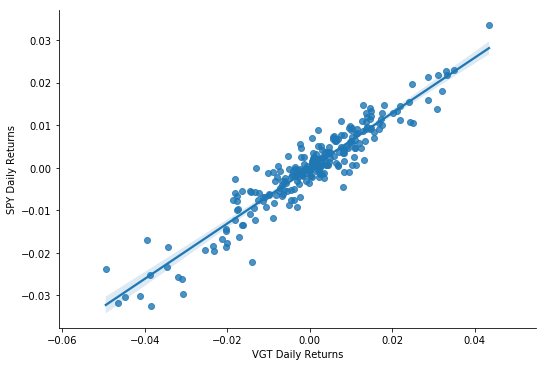

In [20]:
# Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line

sns.lmplot(x='VGT Daily Returns', y='SPY Daily Returns', data= combined_daily_return_year, aspect=1.5, fit_reg=True)

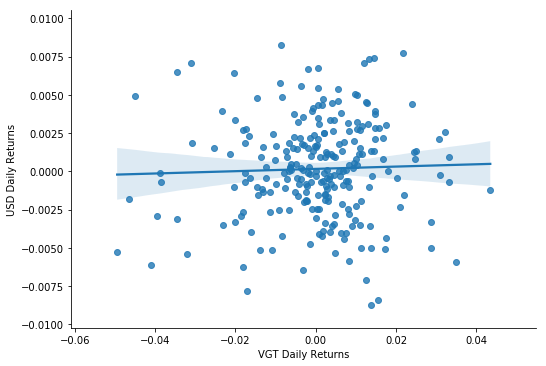

In [21]:

sns.lmplot(x='VGT Daily Returns', y='USD Daily Returns', data=combined_daily_return_year, aspect=1.5, fit_reg=True)

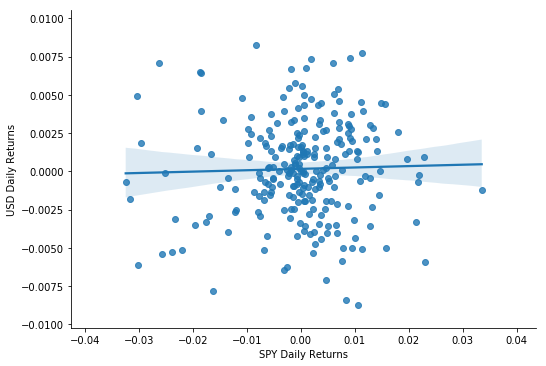

In [22]:
sns.lmplot(x='SPY Daily Returns', y='USD Daily Returns', data=combined_daily_return_year, aspect=1.5, fit_reg=True)

In [23]:
# Calculate Sharpe Ratio
sharpe_ratios = (combined_daily_return_year.mean() * 252) / (combined_daily_return_year.std() * np.sqrt(252))
sharpe_ratios

VGT Daily Returns    0.339675
SPY Daily Returns    0.112712
USD Daily Returns    0.809507
dtype: float64

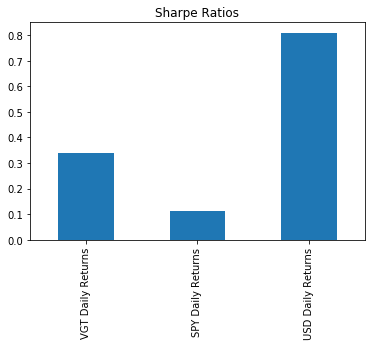

In [24]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")